# Setting up workspace

In [1]:
# Importing needed libraries
import re
import pandas as pd
import numpy as np
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [2]:
# Creating DataFrame with given CSV

file = 'Data/sharks.csv'

df = pd.read_csv(file, engine='python') # We have an error reading the CSV, so we set engine to 'python'

# Exploring the dataset

In [3]:
# Taking a quick visual exploration on the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 24 columns):
Case Number               5992 non-null object
Date                      5992 non-null object
Year                      5992 non-null int64
Type                      5992 non-null object
Country                   5949 non-null object
Area                      5590 non-null object
Location                  5496 non-null object
Activity                  5465 non-null object
Name                      5792 non-null object
Sex                       5425 non-null object
Age                       3311 non-null object
Injury                    5965 non-null object
Fatal (Y/N)               5973 non-null object
Time                      2779 non-null object
Species                   3058 non-null object
Investigator or Source    5977 non-null object
pdf                       5992 non-null object
href formula              5991 non-null object
href                      5989 non-null object
C

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
# Counting missing values on our DataFrame:

def df_total_na(df):
    '''
    Returns the percentage of total NULL values in the dataset
    '''
    total_obs = df.count().sum()
    total_nas = df.isna().sum().sum()
    nas_percentage = total_nas *100 / total_obs
    
    print(f'Our dataset has {round(nas_percentage, 2)}% missing values overall' )

df_total_na(df)



Our dataset has 19.15% missing values overall


In [6]:
# Also checking what columns have more count of null values

def column_nulls_percentage(df):
    '''
    Returns a series indicating percentage of NULLS per column
    '''
    # .mean() gets the NULL values and divides it by the total length of the column
    
    return df.isna().mean().round(4) * 100


print(column_nulls_percentage(df))

Case Number                0.00
Date                       0.00
Year                       0.00
Type                       0.00
Country                    0.72
Area                       6.71
Location                   8.28
Activity                   8.80
Name                       3.34
Sex                        9.46
Age                       44.74
Injury                     0.45
Fatal (Y/N)                0.32
Time                      53.62
Species                   48.97
Investigator or Source     0.25
pdf                        0.00
href formula               0.02
href                       0.05
Case Number.1              0.00
Case Number.2              0.00
original order             0.00
Unnamed: 22               99.98
Unnamed: 23               99.97
dtype: float64


In [7]:
# Checking the column names, and analyzing if they're useful:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [8]:
# Date and Year seem to have duplicated information, let's check it out:

df[['Date', 'Year']].head()

# Year contains duplicated data

,Date,Year
0,18-Sep-16,2016
1,18-Sep-16,2016
2,18-Sep-16,2016
3,17-Sep-16,2016
4,16-Sep-16,2016


## Removing unwanted columns

In [9]:
# We decided, due to the number of NA values 
# and the content of the observations, that we'll eliminate the following columns:
# 'Case Number', 'Case Number.1', 'Case Number.2' provides IDs not useful for analysis, and contains too many NA's
# 'pdf' contains unuseful name archives
# 'Year' contains duplicated data
# 'Type' contains unclear values for our study
# 'href formula', 'href' contains links leading to non-existing web pages


drop = ['Case Number', 'Type', 'Year', 'Year', 'pdf', 'href formula', 'href', 'Case Number.1', 
        'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']

df.drop(drop, axis=1, inplace=True)

In [10]:
# We'll also rename some columns for a more clear/practical analysis:

df = df.rename({'Sex ': 'sex', 'Fatal (Y/N)': 'fatal', 'Investigator or Source': 'source' }, axis=1)

# Lowering the columns so it's easier to manipulate
col_names = [col.lower() for col in df.columns]
df.columns = col_names

df.columns


Index(['date', 'country', 'area', 'location', 'activity', 'name', 'sex', 'age',
       'injury', 'fatal', 'time', 'species ', 'source'],
      dtype='object')

# Manipulating the dataset

In [11]:
# Checking the type of the observations to see if they're useful or in need of treatment.

df.dtypes

# Here we can see that the majority of data collected it's not categorized properly.

date        object
country     object
area        object
location    object
activity    object
name        object
sex         object
age         object
injury      object
fatal       object
time        object
species     object
source      object
dtype: object

## Setting up a DateTime Index

In [12]:
# We can set the index of the DataFrame in order to have a proper way to study it, using the 'date' column:

df['date'].head(10)


0    18-Sep-16
1    18-Sep-16
2    18-Sep-16
3    17-Sep-16
4    16-Sep-16
5    15-Sep-16
6    11-Sep-16
7    07-Sep-16
8    06-Sep-16
9    05-Sep-16
Name: date, dtype: object

We'll try to set all the column values to datetime objects, and set the non-readable values to NaT. 

In [13]:
df_time = df['date']

df_time = pd.to_datetime(df_time, errors='coerce')

df_time.count()

5135

We see we have 5135 values out of 5991, we consider it viable for our analysis.
Setting this series as index for our dataframe.

In [14]:
df = df.set_index(df_time)
df.head(1)

# We can also drop the 'date' column since it's in our index. 
# We'll also drop the rows in which we don't have this index

df.drop('date', axis=1, inplace=True)


In [15]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

Testing our index's capabilities. Let's count all cases from 1980 to 1981

In [16]:
print(df['1 Jan 1980':'1 Jan 1981'].shape)

(31, 12)


Also finding exact dates:

In [17]:
df['1 Jan 2006']

,country,area,location,activity,name,sex,age,injury,fatal,time,species,source
date,,,,,,,,,,,,
2006-01-01,SOUTH AFRICA,Western Cape Province,Soetwater,Diving for crayfish,John Williams,M,49,Lacerations to little finger,N,NaN,Said to involve a 1.5 m shark,"J.P. Botha, GSAF"


Formatting our index so it's clearer

In [18]:
df.index = df.index.rename('')

df.index = df.index.strftime('%B %d, %Y')

## Location manipulation

On the format we've given, we can see 3 rows which can be converted to just one by joining them and manipulating its content

In [19]:
location_cols = ['country', 'area', 'location']

df[location_cols].head(3)


,country,area,location
"September 18, 2016",USA,Florida,"New Smyrna Beach, Volusia County"
"September 18, 2016",USA,Florida,"New Smyrna Beach, Volusia County"
"September 18, 2016",USA,Florida,"New Smyrna Beach, Volusia County"


We'll make sure that all our values are strings:

In [20]:
df[location_cols] = df[location_cols].astype(str)

In [21]:
# These values needs to be capitalized and joined. We'll make a function for it:

def capital(series):
    return str(series).title()

lst = [[capital(value) for value in df[string]] for string in location_cols]
lst_array = np.array(lst)
print(f'Our list has {lst_array.shape[0]} columns and {lst_array.shape[1]} rows')

country, area, loc = lst[0], lst[1], lst[2]

locations = [x + ', ' + y  + ', ' + z for x, y, z in zip(loc, area, country)]

df['locations'] = locations

df['locations']

df.head(3)

# This 'locations' column will be used to create Coordinates for geolocation.

Our list has 3 columns and 5992 rows


,country,area,location,activity,name,sex,age,injury,fatal,time,species,source,locations
"September 18, 2016",USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"
"September 18, 2016",USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"
"September 18, 2016",USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"


Now we can remove three rows of our dataframe: 'area' and 'location'. We'll keep Country for visualization pruposes

In [22]:
df.drop(df[['area', 'location']], axis=1, inplace=True)
df.rename({'locations': 'location'}, axis=1)
df.head(3)

,country,activity,name,sex,age,injury,fatal,time,species,source,locations
"September 18, 2016",USA,Surfing,male,M,16,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"
"September 18, 2016",USA,Surfing,Chucky Luciano,M,36,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"
"September 18, 2016",USA,Surfing,male,M,43,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"


## Age column

In [23]:
# Let's see how much of the values in 'age' have valid data points:

regex = '\d{1,2}'

valid_ages = df['age'].str.contains(regex)

valid_ages.value_counts(dropna=False)

# We see that we have a total 3280 '1 or 2 digit' type observations. 

True     3280
NaN      2681
False      31
Name: age, dtype: int64

In [24]:
print(df['age'].value_counts())


17              148
18              145
19              138
20              136
15              135
               ... 
36 & 26           1
>50               1
84                1
"middle-age"      1
25 or 28          1
Name: age, Length: 151, dtype: int64


In [25]:
# We would like to convert 'age' to numeric, but first we'll have to clean it up:

#print(df['age'].value_counts())

def clean_2d_age(string):
    '''
    Takes a string containing numbers and converts it to a one or two digits integer
    '''
    try:
        pattern='\d{1,2}' # using this pattern so we just find one or two digits
        num = re.findall(pattern, string)[0]
        return int(num)
    except:
        return None


age = df['age'].apply(clean_2d_age).astype(int, errors='ignore')

df['age'] = age

df.head(3)



,country,activity,name,sex,age,injury,fatal,time,species,source,locations
"September 18, 2016",USA,Surfing,male,M,16.0,Minor injury to thigh,N,13h00,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"
"September 18, 2016",USA,Surfing,Chucky Luciano,M,36.0,Lacerations to hands,N,11h00,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"
"September 18, 2016",USA,Surfing,male,M,43.0,Lacerations to lower leg,N,10h43,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"


## 'Fatal' column: Bool variables

In [26]:
# We see 'fatal' column should behave as a boolean, so we transform it

df['fatal'] = df['fatal'].astype(str)
print(df['fatal'].value_counts())

N          4315
Y          1552
UNKNOWN      94
nan          19
 N            8
#VALUE!       1
N             1
n             1
F             1
Name: fatal, dtype: int64


In [27]:
# Defining a function for assigning Yes/No to True/False with regex:

def yn_to_tf(string):
    '''
    Analyzes a string using regex. If the string is Yes, return True.
    If it is No, return False. For invalid data, return Nan
    '''
    if re.search('[Yy]{1}', string):
        return True
    elif re.search('nan', string):
        return None
    elif re.search('[Nn]{1}', string):
        return False
    else:
        return None

fatal = df['fatal'].apply(yn_to_tf)
df['fatal'] = fatal.astype(bool)

df['fatal'].value_counts()

False    4440
True     1552
Name: fatal, dtype: int64

## Sex column: Categorical variables

In [28]:
df['sex'].value_counts()
df['sex'] = df.sex.astype(str)

In [29]:
# Similar treatment for 'sex' column:

def mf_to_malefemale(string):
    if re.search('[Mm]{1}', string):
        sex = 'male'
        return sex
    elif re.search('[Ff]{1}', string):
        sex = 'female'
        return sex
    else:
        return None

sex = df['sex'].apply(mf_to_malefemale)

print(sex.value_counts())

df['sex'] = sex

male      4837
female     585
Name: sex, dtype: int64


In [30]:
df.head(3)

,country,activity,name,sex,age,injury,fatal,time,species,source,locations
"September 18, 2016",USA,Surfing,male,male,16.0,Minor injury to thigh,False,13h00,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"
"September 18, 2016",USA,Surfing,Chucky Luciano,male,36.0,Lacerations to hands,False,11h00,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"
"September 18, 2016",USA,Surfing,male,male,43.0,Lacerations to lower leg,False,10h43,NaN,"Orlando Sentinel, 9/19/2016","New Smyrna Beach, Volusia County, Florida, Usa"


## Name column: Setting to NaN unwanted values

In [31]:
# This column is far too complex to extract names, so we'll just mitigate some common invalid points:

names = df['name'].astype(str)

names.value_counts()

print(names.astype(str).dtypes)

object


In [33]:
# Extracting the most common values errors from value_counts:
names.value_counts()

male              495
nan               200
female             85
boy                23
boat               14
                 ... 
Copley              1
William Munich      1
Rob Konrad          1
Zama Ndamase        1
Sylvia Lucas        1
Name: name, Length: 5010, dtype: int64

In [38]:
errors = names.value_counts().index.tolist()

We'll remove the 12 more common errors:
errors = errors[:12]

def delete_errors(name):
    '''
    Takes a series and sets to NONE al values found in a 
    list of values "errors"
    '''
    if name in errors:
        return None
    else:
        return name
    
    
df['names_clean'] = names.apply(delete_errors)

df['names'] = df['names_clean']

df['names_clean'].value_counts()



['male',
 'nan',
 'female',
 'boy',
 'boat',
 '2 males',
 'sailor',
 'Anonymous',
 'child',
 'girl',
 'a sailor',
 'Unidentified',
 'males',
 'fisherman',
 'a pearl diver',
 'a native',
 'Unknown',
 'black male',
 'a soldier',
 'Arab boy',
 '2 fishermen',
 'woman',
 'Andre Hartman',
 'Zulu male',
 'M.C.',
 'Japanese diver',
 '2 women',
 ' male',
 'unknown',
 'dinghy',
 'native boy',
 'Russian male',
 'aboriginal male',
 '3 males',
 'A chiefess',
 'a local dignitary',
 'John Hayes',
 'Charles Cook',
 'Mr. Meyer',
 'William Black',
 'crew',
 'Gordon Harmer',
 'Hideo Ishida',
 'Morris M. Vorenberg',
 'Iona Asai',
 ' 2 males',
 'fishermen',
 'a native fisherman',
 'a pilot',
 'Coast Guard personnel',
 'Parang',
 'Andy Austin',
 "12' dinghy",
 '"a youth"',
 '2 men',
 'Ali',
 'teen',
 'Greg Pickering',
 'Carey Ford',
 'Gerjo Van Niekerk',
 'Ken Howell',
 'Theirry Mercredi',
 'Rory O�Connor',
 'male, a Japanese fisherman',
 'John Ford',
 'Fijian girl',
 'Seth Mead',
 'Davies',
 'Len Jones',
 

In [33]:
df.index = pd.to_datetime(df.index)

## Now we can delete all rows containing missing data points, and save the csv:

In [34]:
df_clean = df.dropna(axis=0)
df_clean.shape
df_clean.index = pd.to_datetime(df_clean.index)
df.to_csv('Data/clean.csv')

# Using the DataFrame

Making a quick visualization for shark attack records over years:    

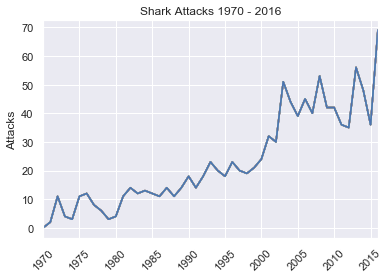

In [35]:
register_matplotlib_converters()

sns.set()
df_plot = df_clean.resample('Y').count()
plt.plot(df_plot)
plt.title('Shark Attacks 1970 - 2016')
plt.ylabel('Attacks')
plt.xticks(rotation=45)
plt.xlim('1-1-1970', '1-1-2016')
plt.show()

## 'in {date}, a {sex} of age{age} named {name}, was {activity} in {location} when got {injuries}, he/she{sex} died/didn't die{fatal}, as pointed out by {source}